In [1]:
#Il dataset viene da https://data-flair.training/blogs/advanced-python-project-detecting-fake-news/
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(5, 4))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    #plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.xlabel('Predicted label')
    plt.show()

In [3]:
#Leggo i dati
df=pd.read_csv('C:\\news.csv')
df.shape
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
df.label

0       FAKE
1       FAKE
2       REAL
3       FAKE
4       REAL
        ... 
6330    REAL
6331    FAKE
6332    FAKE
6333    REAL
6334    REAL
Name: label, Length: 6335, dtype: object

In [5]:
#Prendo le Labels
labels=df.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [6]:
#Divido il dataset
x_train,x_test,y_train,y_test=train_test_split(df['text'], labels, test_size=0.2, random_state=7)

In [7]:
#Iniziallizzo un TfidfVectorizer per estrarre le feature
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

#Fit e transform il train set, transform il test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

## LOGISTIC REGRESSION

In [10]:
from sklearn.linear_model import LogisticRegression
#Inizializzo un Logistic Regression Classifier
logreg = LogisticRegression(C=1).fit(tfidf_train, y_train)

#Risultati
y_pred_log=logreg.predict(tfidf_test)
score_log=accuracy_score(y_test,y_pred_log)
print(f'Accuracy: {round(score_log*100,2)}%')

Accuracy: 91.71%


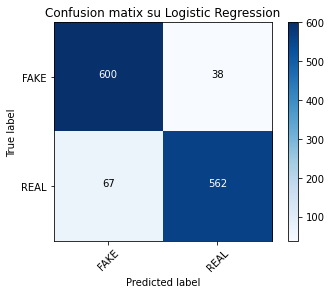

In [11]:
#Confusion matrix
plot_confusion_matrix(confusion_matrix(y_test,y_pred_log, labels=['FAKE','REAL']),target_names=['FAKE','REAL'], 
                      normalize = False,
                      title = 'Confusion matix su Logistic Regression')

## DECISION TREE CLASSIFIER 

In [12]:
from sklearn.tree import DecisionTreeClassifier
#Iniziallizza un Decision Tree Classifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(tfidf_train, y_train)

#Risultati
y_pred_tree=tree.predict(tfidf_test)
score_tree=accuracy_score(y_test,y_pred_tree)
print(f'Accuracy: {round(score_tree*100,2)}%')

Accuracy: 82.0%


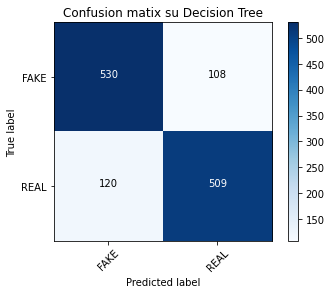

In [13]:
#Confusion matrix
plot_confusion_matrix(confusion_matrix(y_test,y_pred_tree, labels=['FAKE','REAL']),target_names=['FAKE','REAL'], 
                      normalize = False,
                      title = 'Confusion matix su Decision Tree')

## SVM

In [14]:
from sklearn import svm
from sklearn.svm import SVC
#Iniziallizza una SVM
svm = SVC()
svm.fit(tfidf_train, y_train)

#Risultati
y_pred_svm=svm.predict(tfidf_test)
score_svm=accuracy_score(y_test,y_pred_svm)
print(f'Accuracy: {round(score_svm*100,2)}%')

Accuracy: 92.9%


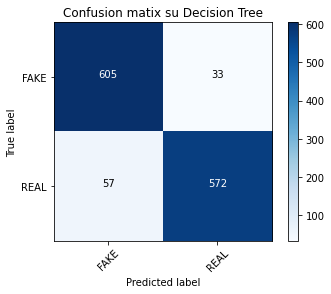

In [15]:
#Confusion matrix
plot_confusion_matrix(confusion_matrix(y_test,y_pred_svm, labels=['FAKE','REAL']),target_names=['FAKE','REAL'], 
                      normalize = False,
                      title = 'Confusion matix su SVM')

## NAIVE BAYES CLASSIFIER

In [19]:
#Inizializzo un Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
nbc = MultinomialNB()
nbc.fit(tfidf_train, y_train)

#Risultati
y_pred_nbc=nbc.predict(tfidf_test)
score_nbc=accuracy_score(y_test,y_pred_nbc)
print(f'Accuracy: {round(score_nbc*100,2)}%')

Accuracy: 84.06%


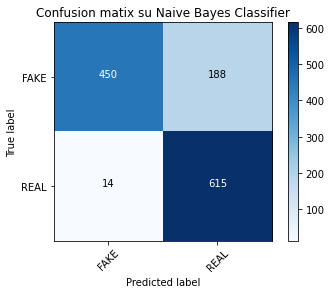

In [20]:
#Confusion matrix
plot_confusion_matrix(confusion_matrix(y_test,y_pred_nbc, labels=['FAKE','REAL']),target_names=['FAKE','REAL'], 
                      normalize = False,
                      title = 'Confusion matix su Naive Bayes Classifier')